In [84]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)
from scipy.io import loadmat

OpenCV Version : 4.4.0 


In [86]:
#Leitura da imagem (.jpg):
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_33.jpg"), cv2.COLOR_BGR2RGB)

In [90]:
#Leitura das anotações (.mat):
annots = loadmat('ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_33.mat')
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'image_info'])

In [92]:
a = annots["image_info"]
type(a)

numpy.ndarray

In [113]:
#Função que recebe o id (inteiro) da imagem e retorna duas listas com as posições x e y, respectivamente, das anotações
def getGTpoints(number, part):
    
    #Abrindo o arquivo com as anotações em .mat:
    annots = loadmat('ShanghaiTech/part_{0}/train_data/ground-truth/GT_IMG_{1}.mat'.format(part, number))
    a = annots["image_info"]
    #Lendo o elemento do array que possui as anotações:
    ground_truth = a[0][0][0][0][0]
    #Cria duas listas, com a posição no eixo x e no eixo y de cada anotação:
    x = []
    y = []
    for e in ground_truth:
        x.append(e[0])
        y.append(e[1])
        
    #Retorna as listas x e y
    return x, y

Digite a parte do Dataset:A
Digite o id da Imagem:5


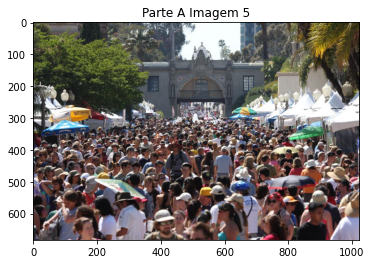

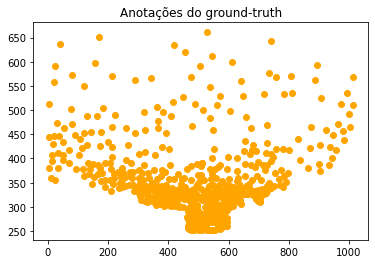

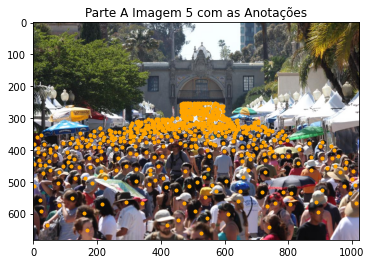

In [126]:
part = input("Digite a parte do Dataset:")
n = int(input("Digite o id da Imagem:"))
x, y = getGTpoints(n, "A")

#Plot da Imagem:
image = cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB)
plt.title("Parte {0} Imagem {1}".format(part, n))
plt.imshow(image)
plt.show()

#Gráfico dos pontos com a posição de cada cabeça:
plt.plot(x, y, "o", color="orange")
plt.title("Anotações do ground-truth")
plt.show()

#Plot da imagem com as anotações:
plt.imshow(cv2.cvtColor(cv2.imread("ShanghaiTech/part_A/train_data/images/IMG_{}.jpg".format(n)), cv2.COLOR_BGR2RGB))
plt.plot(x, y, "o", markersize=3, color="orange")
plt.title("Parte {0} Imagem {1} com as Anotações".format(part, n))
plt.show()